In [8]:
import random
import numpy as np
import matplotlib.pyplot as plt
        

In [2]:
class Field:
    def __init__(self, size, item_pickup, item_drop_off, start_position):
        self.size = size
        self.item_pickup = item_pickup
        self.item_drop_off = item_drop_off
        self.position = start_position
        self.item_in_car = False
        
    def get_number_of_states(self):
        return self.size*self.size*self.size*self.size*2
    
    def get_state(self):
        state = self.position[0]*self.size*self.size*self.size*2
        state = state + self.position[1]*self.size*self.size*2
        state = state + self.item_pickup[0]*self.size*2
        state = state + self.item_pickup[1]*2
        if self.item_in_car:
            state = state + 1
        return state
        
    def make_action(self, action):
        (x, y) = self.position
        if action == 0:  # Go South
            if y == self.size - 1:
                return -10, False
            else:
                self.position = (x, y + 1)
                return -1, False
        elif action == 1:  # Go North
            if y == 0:
                return -10, False
            else:
                self.position = (x, y - 1)
                return -1, False
        elif action == 2:  # Go East
            if x == 0:
                return -10, False
            else:
                self.position = (x - 1, y)
                return -1, False
        elif action == 3:  # Go West
            if x == self.size - 1:
                return -10, False
            else:
                self.position = (x + 1, y)
                return -1, False
        elif action == 4:  # Pickup item
            if self.item_in_car:
                return -10, False
            elif self.item_pickup != (x, y):
                return -10, False
            else:
                self.item_in_car = True
                return 20, False
        elif action == 5:  # Drop off item
            if not self.item_in_car:
                return -10, False
            elif self.item_drop_off != (x, y):
                self.item_pickup = (x, y)
                self.item_in_car = False
                return -10, False
            else:
                return 20, True

In [3]:
def naive_solution():
    size = 10
    item_start = (0, 0)
    item_drop_off = (9, 9)
    start_position = (0, 9)
    
    field = Field(size, item_start, item_drop_off, start_position)
    done = False
    steps = 0
    
    while not done:
        action = random.randint(0, 5)
        reward, done = field.make_action(action)
        steps = steps + 1
    
    return steps


naive_solution()

182264

In [4]:
runs = [naive_solution() for _ in range(1000)]
sum(runs)/len(runs)

151853.813

In [5]:
size = 10
item_start = (0, 0)
item_drop_off = (9, 9)
start_position = (0, 9)

field = Field(size, item_start, item_drop_off, start_position)

number_of_states = field.get_number_of_states()
number_of_actions = 6

q_table = np.zeros((number_of_states, number_of_actions))


def reinforcement_learning():
    epsilon = 0.1
    alpha = 0.1
    gamma = 0.6
    
    field = Field(size, item_start, item_drop_off, start_position)
    done = False
    steps = 0
    
    while not done:
        state = field.get_state()
        if random.uniform(0, 1) < epsilon:
            action = random.randint(0, 5)
        else:
            action = np.argmax(q_table[state])
            
        reward, done = field.make_action(action)
        # Q[state, action] = (1 – alpha) * Q[state, action] + alpha * (reward + gamma * max(Q[new_state]) — Q[state, action])
        
        new_state = field.get_state()
        new_state_max = np.max(q_table[new_state])
        
        q_table[state, action] = (1 - alpha)*q_table[state, action] + alpha*(reward + gamma*new_state_max - q_table[state, action])
        
        steps = steps + 1
    
    return steps


reinforcement_learning()

26204

In [6]:
runs_rl = [reinforcement_learning() for _ in range(1000)]
sum(runs_rl)/len(runs_rl)

228.958

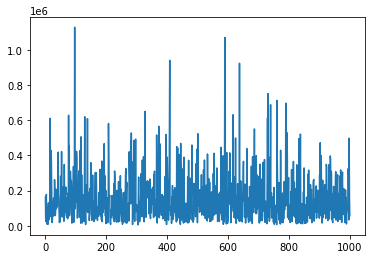

In [11]:
fig, ax = plt.subplots()
ax.plot(np.linspace(1,1000, 1000), runs)
plt.show()


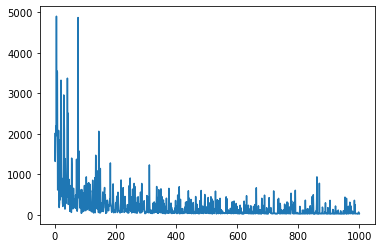

In [12]:
plt.plot(np.linspace(1,1000, 1000), runs_rl)